## Section 1 - Defining the value and reward functions for a multi-armed bandit

In [10]:
'''
Implementing a k-armed bandit where k = 8. The value of k is the number of possible actions
at any time step. Each action earns a reward.
'''
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

k = 8 #number of possible actions at each timestep
def value_function():
    '''
    This function takes 0 inputs and returns a set of mean values as a pandas series. These values correspond to the expected rewards for each
    action
    '''
    #generate the expected (mean) reward - q⇤(At) - for each action according to a normal (Gaussian) distribution with mean=0 and variance=1
    q = np.random.normal(0,1,8)
    exp_rewards = pd.Series(q, index = [1, 2, 3, 4, 5, 6, 7, 8]) #convert the list to a pandas series with element indexes corresponding to the actions
    return exp_rewards

def reward_function(a, mean_values):
    '''
    The function takes an action as input and generates a random reward using a normal (Gaussian) distribution
    '''
    return np.random.normal(mean_values[a], 1) #generate a reward for an action At according to a normal distribution with mean=q⇤(At) and variance=1

## Section 2 - Implementing a greedy and an ε-greedy action selection method


```c++
For the greedy selection method where ε=0, the probability of exploiting is 1 at each time-step, apart from the first where an action is selected at random

For the ε-greedy selection method, the probability of exploring is ε and the probability of exploiting is [1-ε] where ε is a user-defined probability
```


In [11]:
def ε_greedy(estimated_rewards, epsilon):
    '''
    The function selects the action with the highest estimated reward with probability (1-ε) - EXPLOITATION
    Or it chooses a random action with probabiliy ε - EXPLORATION
    At the first timestep when no actions have been performed yet, it selects one at random
    '''
    prob = np.random.rand() #generate a random number (probability) in the interval [0,1)
    if max(action_count.values()) == 0:
       return np.random.randint(1, k+1, dtype = int) #at the timestep = 1 when no actions have been performed yet, select one at random
    elif prob < epsilon:
       return np.random.randint(1, k+1, dtype = int) #exploration
    else:
       return max(estimated_rewards, key=estimated_rewards.get) #exploitation

epsilon = []
while True:
   ε = input('Epsilon value to test (type "000" to stop prompt): ')
   if ε == '000':
      break
   else:
      epsilon.append(float(ε))

episodes = int(input('Number of episodes: ')) #run the MAB algorithm for each epsilon value for the given nuber of episodes
timesteps = int(input('Number of timesteps: ')) #each episode lasts for the given number of timesteps
epsilonRewards_dict = {} #create a dictionary to store the long-term averages for each epsilon value at each timestep
optimalActions_dict = {} #create a dictionary to store the optimal actions count for each epsilon value at each timestep

for e in epsilon:
   epsilonRewards_dict[e] = np.zeros(timesteps) #initialize the long-term averages at each timestep for each epsilon value to 0
   optimalActions_dict[e] = np.zeros(timesteps) #initialize the optimal actions count at each timestep for each epsilon value to 0

for episode in range (1,episodes+1):
   mean_values = value_function() #call the 'value_function' to generate a new set of mean values for each action using a normal (Gaussian) distribution
   optimal_action = mean_values.argmax() + 1 #identify the action with the highest reward (optimal action)
   for eps in epsilon:
      #create a dictionary to store the estimated reward for each action and another dictionary to store the number of times
      #each action has been performed
      estimated_rewards = {}
      action_count = {}
      #initialize the estimated rewards and action counts to 0
      for action in range(1,k+1):
            estimated_rewards[action] = 0
            action_count[action] = 0

      averageReward = 0 #average reward at each timestep (initialized to 0)
      averageRewardList = [] #list to store the average rewards across all timesteps

      for t in range(1,timesteps+1):
         action = ε_greedy(estimated_rewards, eps) #call the 'ε_greedy' function to select an action
         action_count[action] += 1 #increment the chosen action's count by 1
         reward =  reward_function(action, mean_values) #call the 'reward_function' function to get a reward for the chosen action
         averageReward = averageReward + ((1/t) * (reward - averageReward)) #calculate the average reward at the currrent timestep
         averageRewardList.append(averageReward) #add this value to the average rewards list
         #incrementally implement the sample-average method to update the estimate of the selected action's reward
         estimated_rewards[action] = estimated_rewards[action] + ((1/action_count[action])*(reward - estimated_rewards[action]))

         if action == optimal_action:
            #if the action selected at a timestep for an epsilon value is the optimal action, increase the count at the 
            #relevant index in the optimal actions dictionary by 1
            optimalActions_dict[eps][t-1] += 1

      #update the long-term average at each timestep for epsilon = eps
      epsilonRewards_dict[eps] = epsilonRewards_dict[eps] + ((averageRewardList - epsilonRewards_dict[eps]) / episode)

for eps in epsilon:
   #convert the optimal action counts for each epsilon value to percentages
   optimalActions_dict[eps] = optimalActions_dict[eps] * (100/episodes)

## Section 3 - Visualizing the results

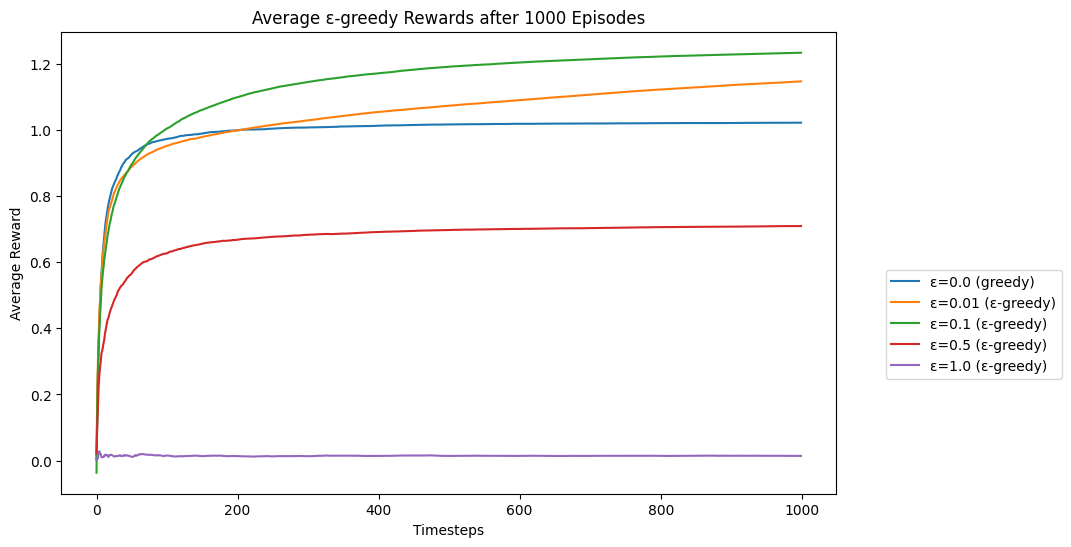

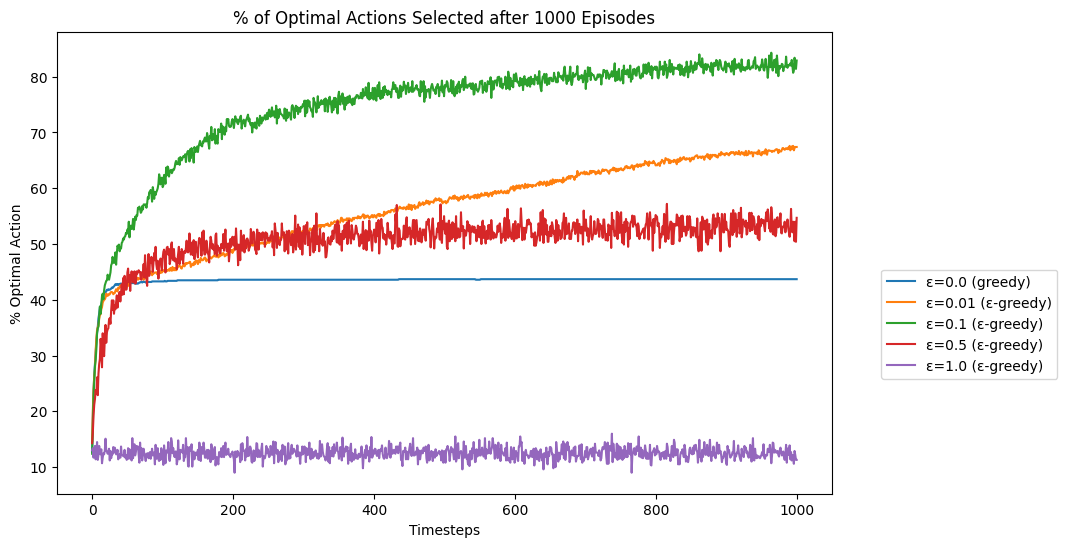

In [12]:
#plot the results for the average rewards
plt.figure(figsize=(10,6))
for eps in epsilon:
   if eps == 0:
      plt.plot(epsilonRewards_dict[eps], label=f"ε={eps} (greedy)")
   else:
      plt.plot(epsilonRewards_dict[eps], label=f"ε={eps} (ε-greedy)")
   plt.legend(bbox_to_anchor=(1.3, 0.5))
   plt.xlabel("Timesteps")
   plt.ylabel("Average Reward")
   plt.title(f"Average ε-greedy Rewards after {episodes} Episodes")

#plot the results for the % of optimal actions
plt.figure(figsize=(10,6))
for eps in epsilon:
   if eps == 0:
      plt.plot(optimalActions_dict[eps], label=f"ε={eps} (greedy)")
   else:
      plt.plot(optimalActions_dict[eps], label=f"ε={eps} (ε-greedy)")
   plt.legend(bbox_to_anchor=(1.3, 0.5))
   plt.xlabel("Timesteps")
   plt.ylabel("% Optimal Action")
   plt.title(f"% of Optimal Actions Selected after {episodes} Episodes")